In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [6]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [7]:
### adding 'train_test' column to both df and concat them into one
df_train['train_test'] =1
df_test['train_test'] = 0
df_test['Survived'] = np.NaN
all_data = pd.concat([df_train,df_test])
# all_data.columns

## EDA on Training Dataset

### For numeric data
1. Made histograms to understand distributions
2. Corrplot
3. Pivot table comparing survival rate across numeric variables

### For Categorical Data
1. Made bar charts to understand balance of classes
2. Made pivot tables to understand each class relationship with survival variable

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [9]:
### training set has 891 entries
df_train.shape

(891, 13)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [11]:
df_train.describe(include = 'all')
### from this table, we can see that average survive rate is around 40%. This means more people died after the disaster within this training set. 
### we can also see that the average age is 29 and median is 28. This means that the training set population's distribution is very close to normal distribution

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891.0
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN
top,NaN,NaN,NaN,"Nysveen, Mr. Johan Hansen",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,1.0
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,0.0
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,1.0
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,1.0
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,1.0
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,1.0


In [12]:
df_train.isnull().sum()
### checking the null on each column. Age, Cabin, and Embarked column has null entries

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train_test       0
dtype: int64

In [13]:
df_cat = df_train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

In [14]:
df_num = df_train[['Age', 'SibSp', 'Parch', 'Fare']]

### Made histograms to understand distributions for numerical parts

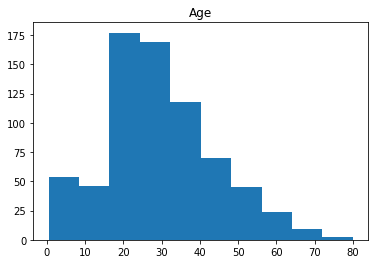

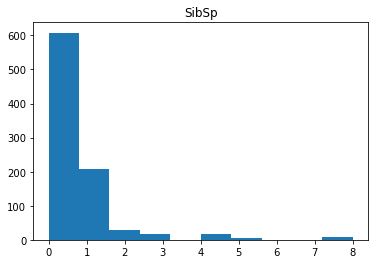

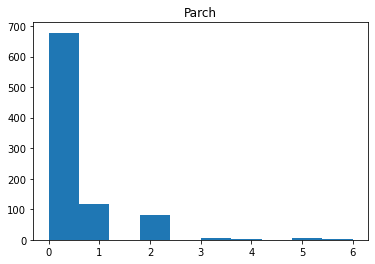

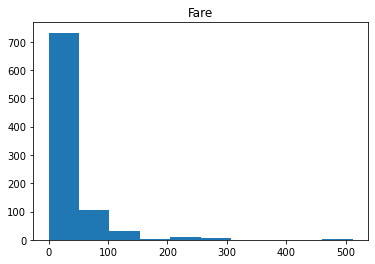

In [15]:
for item in df_num.columns:
    plt.hist(df_num[item])
    plt.title(item)
    plt.show()

## Making Corr Table and Plot

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

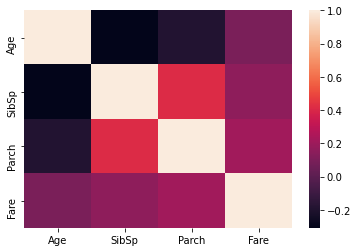

In [16]:
print(df_num.corr())
sns.heatmap(df_num.corr())

## Pivot table comparing survival rate across numeric variables

In [17]:
print(pd.pivot_table(df_train, index = 'Survived', values = df_num.columns))
### from here we can see that these columns do have correlations with survived column
### therefore, we will include these four columns when we start training the data

                Age       Fare     Parch     SibSp
Survived                                          
0         30.626179  22.117887  0.329690  0.553734
1         28.343690  48.395408  0.464912  0.473684


In [18]:
str(10)

'10'

## Made bar charts to understand balance of classes

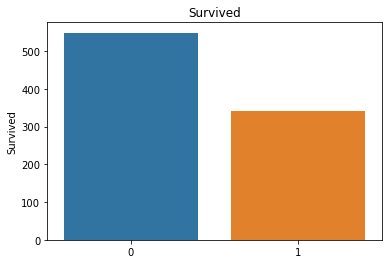

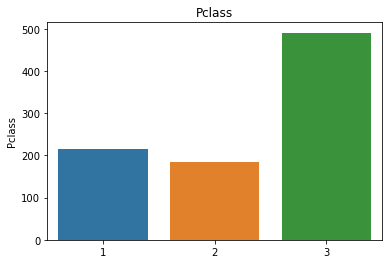

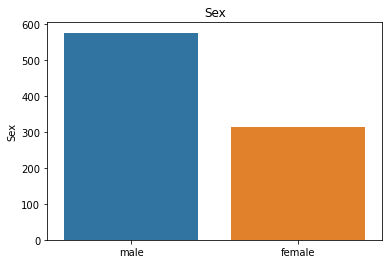

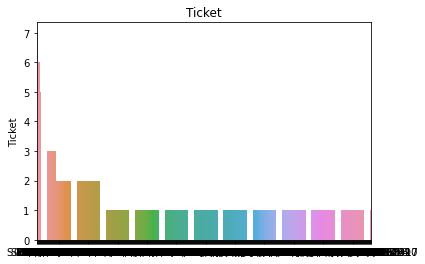

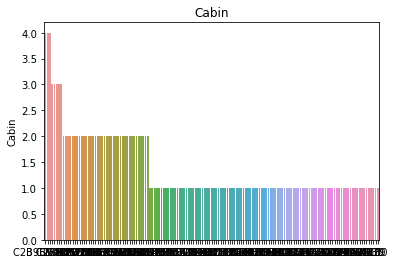

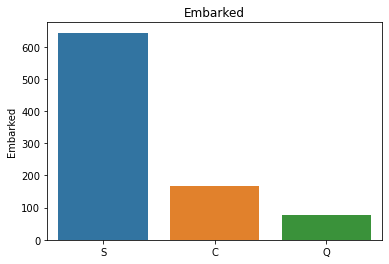

In [19]:
for item in df_cat.columns:
    sns.barplot(df_cat[item].value_counts().index, df_cat[item].value_counts()).set_title(item)
    plt.show()

In [20]:
pd.pivot_table(df_train, index = 'Survived', columns='Embarked', values = 'Ticket', aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [21]:
pd.pivot_table(df_train, index = 'Survived', columns='Sex', values = 'Ticket', aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [22]:
pd.pivot_table(df_train, index = 'Survived', columns='Pclass', values = 'Ticket', aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<AxesSubplot:xlabel='Pclass', ylabel='count'>

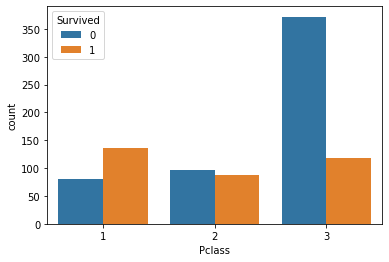

In [23]:
sns.countplot('Pclass',hue = 'Survived', data = df_train)

## Feature Engineering
### Ticket and Cabin column seems messy at this point. We need to give them more meanings.
### Name column seems inrelevant, but prefix might show a person's social status.

In [24]:
pd.isna(df_cat['Cabin']).value_counts()
### there are 687 na for Cabin, we will later turn them into 0.
### for those valid values, cabin will start with class number. So, let's pull out the class info

True     687
False    204
Name: Cabin, dtype: int64

In [25]:
df_train['Cabin_Class'] = df_train['Cabin'].apply(lambda x: 'no class' if pd.isna(x) else x[0])
print(df_train['Cabin_Class'].value_counts())
### there are 8 different kinds of classes for our training dataset

no class    687
C            59
B            47
D            33
E            32
A            15
F            13
G             4
T             1
Name: Cabin_Class, dtype: int64


In [26]:
### let's take a look at the relationship between cabin class and survival
pd.pivot_table(df_train, index = 'Survived', columns='Cabin_Class', values='Name', aggfunc='count')

Cabin_Class,A,B,C,D,E,F,G,T,no class
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


Text(0.5, 1.0, 'Survive vs. Cabin Class')

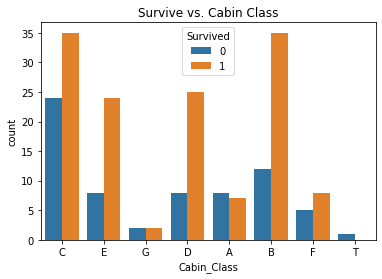

In [27]:
import seaborn as sns
df_cabin_class = df_train.loc[df_train['Cabin_Class']!='no class']
sns.countplot('Cabin_Class', hue = 'Survived', data = df_cabin_class).set_title('Survive vs. Cabin Class')

### there is no na value for Ticket column

In [28]:
pd.isna(df_cat['Ticket']).value_counts()

False    891
Name: Ticket, dtype: int64

### there are 661 entries that have numeric ticket. From the pivot table, whether the ticket is numeric or not does not seem to have effect on survival

In [29]:
df_train['Ticket_numeric'] = df_cat['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
print(df_train['Ticket_numeric'].value_counts())
pd.pivot_table(df_train, index = 'Survived', columns = 'Ticket_numeric', values = 'Name', aggfunc='count')

1    661
0    230
Name: Ticket_numeric, dtype: int64


Ticket_numeric,0,1
Survived,,
0,142,407
1,88,254


### Let's also explore the prefix value before the number when the ticket is not numeric value. But we need to clean the prefix before we can actually use it

In [30]:
df_train.loc[df_train['Ticket_numeric']==0]['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
10              PP 9549
12            A/5. 2151
             ...       
867            PC 17590
874           P/PP 3381
883    C.A./SOTON 34068
884     SOTON/OQ 392076
888          W./C. 6607
Name: Ticket, Length: 230, dtype: object

In [31]:
df_train['Ticket_prefix'] = df_train['Ticket'].apply(lambda x: ''.join(x.split(' ')[:-1]).replace('/','').replace('.','').lower() if len(x.split(' ')[:-1])>0 else 0)
df_train['Ticket_prefix'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
wep            3
sopp           3
pp             3
swpp           2
sotono2        2
ppp            2
scah           2
as             1
fc             1
sca4           1
fa             1
sp             1
sc             1
scow           1
scahbasle      1
sop            1
casoton        1
Name: Ticket_prefix, dtype: int64

### there does not seem a pattern here to explain the effect of ticket on survival. Therefore, we will not focus on 'Ticket' variable while training our model

In [32]:
pd.pivot_table(df_train, index = 'Survived', columns = 'Ticket_prefix', values = 'Name', aggfunc='count')

Ticket_prefix,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


### Last but not least, let's explore the Name column. 

In [33]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [34]:
df_train['Name_prefix'] = df_train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [35]:
df_train['Name_prefix'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Don               1
Sir               1
Capt              1
Jonkheer          1
Lady              1
Mme               1
the Countess      1
Name: Name_prefix, dtype: int64

### we can see that the captain does not survive. The Titanic tends to save more of females' lives since 'Miss' and 'Mrs' have more survives than dead. Master also survived more than dead. Slavery still exists at that time and I believe masters will have more chance to survive since they lived in higher cabin classes. 

In [36]:
pd.pivot_table(df_train,  index = 'Survived', columns = 'Name_prefix', values = 'Name', aggfunc='count')

Name_prefix,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


### Data Preprocessing for Model
* Drop na values from 'Embarked' 
* Include only relevant variables based on EDA initial findings

Variables: 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin_Class', 'Ticket_numeric', 'Name_prefix'

* Do categorical transforms on all data.
* Impute data with mean for fare and age (Should also experiment with median)
* Normalized fare using logarithm to give more semblance of a normal distribution
* Scaled data 0-1 with standard scaler

In [37]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [38]:
### create new columns for all_data just like how we deal with df_train

all_data['Name_prefix'] = all_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
all_data['Ticket_numeric'] = all_data['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
all_data['Cabin_Class'] = all_data['Cabin'].apply(lambda x: 'no class' if pd.isna(x) else x[0])

In [39]:
### drop na for 'Embarked' columns
all_data.dropna(subset = ['Embarked'], inplace = True)

In [40]:
all_data.isnull().sum()
### now we need to fill na for 'Age' and 'Fare' Columns

PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                263
SibSp                0
Parch                0
Ticket               0
Fare                 1
Cabin             1014
Embarked             0
train_test           0
Name_prefix          0
Ticket_numeric       0
Cabin_Class          0
dtype: int64

In [41]:
all_data['Age'] = all_data['Age'].fillna(df_train['Age'].mean())
all_data['Fare'] = all_data['Fare'].fillna(df_train['Fare'].mean())
### we can later try median as well. 

<AxesSubplot:>

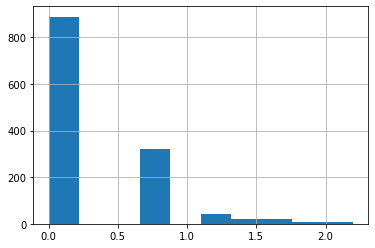

In [42]:
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()
### normalize the variable to see if the distribution looks normal
### still does not look like a normal distribution

<AxesSubplot:>

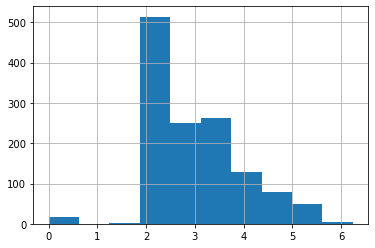

In [43]:
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()
### this looks more like a normal distribution

<AxesSubplot:>

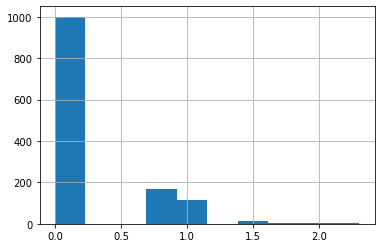

In [44]:
all_data['norm_parch'] = np.log(all_data.Parch+1)
all_data['norm_parch'].hist()

In [45]:
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','Ticket_numeric','Name_prefix','train_test']])

In [46]:
all_dummies.head()

,Pclass,Age,SibSp,Parch,norm_fare,Ticket_numeric,train_test,Sex_female,Sex_male,Embarked_C,...,Name_prefix_Master,Name_prefix_Miss,Name_prefix_Mlle,Name_prefix_Mme,Name_prefix_Mr,Name_prefix_Mrs,Name_prefix_Ms,Name_prefix_Rev,Name_prefix_Sir,Name_prefix_the Countess
0,3,22.0,1,0,2.110213,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,38.0,1,0,4.280593,0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,26.0,0,0,2.188856,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,35.0,1,0,3.990834,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,35.0,0,0,2.202765,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
### now split all_dummies into X_train, X_test, y_train
X_train = all_dummies[all_dummies['train_test']==1].drop(['train_test'], axis=1)
X_test = all_dummies[all_dummies['train_test']==0].drop(['train_test'], axis=1)
y_train = all_data[all_data['train_test']==1]['Survived']
y_test = all_data[all_data['train_test']==0]['Survived']

In [48]:
### use standard scaler from sklearn.processing to scale the numerical data again: including age, sibsp, parch, and fare

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()


In [49]:
all_dummies_scaled[['Age','SibSp','Parch', 'norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch', 'norm_fare']])

In [50]:
all_dummies_scaled.head()

,Pclass,Age,SibSp,Parch,norm_fare,Ticket_numeric,train_test,Sex_female,Sex_male,Embarked_C,...,Name_prefix_Master,Name_prefix_Miss,Name_prefix_Mlle,Name_prefix_Mme,Name_prefix_Mr,Name_prefix_Mrs,Name_prefix_Ms,Name_prefix_Rev,Name_prefix_Sir,Name_prefix_the Countess
0,3,-0.607808,0.480272,-0.445407,-0.896856,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0.636788,0.480272,-0.445407,1.347144,0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,-0.296659,-0.479537,-0.445407,-0.815546,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0.403426,0.480272,-0.445407,1.047556,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3,0.403426,-0.479537,-0.445407,-0.801165,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [51]:
X_train_scaled = all_dummies_scaled[all_dummies_scaled['train_test']==1].drop('train_test',axis = 1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled['train_test']==0].drop('train_test',axis = 1)
y_train = all_data[all_data['train_test']==1]['Survived']

### Model Building (baseline model with defult parameters collecting mean of scores under cross validation = 5)

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [53]:
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train, y_train,cv =5)
print(cv)
print(cv.mean())

[0.65730337 0.73033708 0.79775281 0.78651685 0.64971751]
0.7243255252967689


In [54]:
lr = LogisticRegression()
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81460674 0.80898876 0.80337079 0.80337079 0.85875706]
0.8178188281597156


In [55]:
lr = LogisticRegression()
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.81460674 0.80337079 0.80337079 0.85875706]
0.8200660191709515


In [56]:
dt = tree.DecisionTreeClassifier()
cv = cross_val_score(dt, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.75842697 0.78089888 0.82022472 0.73033708 0.76271186]
0.7705199009712436


In [57]:
dt = tree.DecisionTreeClassifier()
cv = cross_val_score(dt, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.73033708 0.75280899 0.82022472 0.73033708 0.75706215]
0.7581540024122388


In [58]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.76404494 0.79775281 0.79775281 0.80337079 0.83615819]
0.7998159080810004


In [59]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.79213483 0.79775281 0.80898876 0.81460674 0.81355932]
0.8054084936202628


In [60]:
rdf = RandomForestClassifier()
cv = cross_val_score(rdf, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.80337079 0.79213483 0.84831461 0.74719101 0.82485876]
0.8031739986034406


In [61]:
rdf = RandomForestClassifier()
cv = cross_val_score(rdf, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.80898876 0.7752809  0.85393258 0.74719101 0.82485876]
0.8020504030978227


In [62]:
svc = SVC(probability=True)
cv = cross_val_score(svc, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.68539326 0.75842697 0.71910112 0.71910112 0.74576271]
0.7255570367549039


In [63]:
svc = SVC(probability=True)
cv = cross_val_score(svc, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.85875706]
0.8324255697327493


In [64]:
xb = XGBClassifier()
cv = cross_val_score(xb, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.82022472 0.80337079 0.84269663 0.78651685 0.80225989]
0.811013775153939


In [65]:
xb = XGBClassifier()
cv = cross_val_score(xb, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.81460674 0.80337079 0.84269663 0.78651685 0.80225989]
0.809890179648321


In [66]:
from sklearn.ensemble import VotingClassifier
vt = VotingClassifier(estimators=[('gnb',gnb),('lr',lr),('dt',dt),('knn',knn),('rdf',rdf),('svc',svc),('xb',xb)], voting='soft')
cv = cross_val_score(vt, X_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.82022472 0.82022472 0.81460674 0.78651685 0.85875706]
0.8200660191709515


### After Running the baseline model from each classifier, we have a base score for each model
* Naive bayes model: 72.4%
* Linear Regression model: 82.0%
* Decision Tree model: 77.1%
* KNN model: 80.5%
* Random Forest model: 80.3%
* SVM model: 83.2%
* Extreme gradiant boosting model: 81.1%
* Voting Classifier model (soft): 82.0%

In [67]:
### let's use voting classifer to fit our scaled X_train and y_train to get the predicted y
vt.fit(X_train_scaled, y_train)
y_base_predicted = vt.predict(X_test_scaled).astype(int)

In [68]:
y_base_predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Model Tuning Process (grid search method)

In [69]:
from sklearn.model_selection import GridSearchCV

In [73]:
def clf_performance (classifier, model):
    print(model)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [74]:
lr = LogisticRegression()
param_grid = {'max_iter':[2000],
              'penalty':['l1','l2'],
              'C': np.logspace(-4,4,20),
              'solver':['liblinear']}
clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
best_clf_lr = clf_lr.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [75]:
clf_performance(best_clf_lr,'Logistic Regression')

Logistic Regression
Best Score: 0.8223259061766013
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [76]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [77]:
clf_performance(best_clf_knn,'KNN')

KNN
Best Score: 0.824528661207389
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


In [78]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 55 candidates, totalling 275 fits


In [79]:
clf_performance(best_clf_svc,'SVC')

SVC
Best Score: 0.8301783787215132
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [80]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [81]:
clf_performance(best_clf_xgb,'XGB')

XGB
Best Score: 0.8470196153113694
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 5, 'sampling_method': 'uniform', 'subsample': 0.65}


### we can see that xgb model works the highest score after tuning